In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [15]:
from datetime import date

In [7]:
%matplotlib inline
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))
font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

In [3]:
data = pd.read_csv('sunshine.csv')

In [64]:
data.head()

,city,lon,lat,month,monthnum,sunshine
0,Chicago,-87.623177,41.881832,Jan,0,135
1,Chicago,-87.623177,41.881832,Feb,1,136
2,Chicago,-87.623177,41.881832,Mar,2,187
3,Chicago,-87.623177,41.881832,Apr,3,215
4,Chicago,-87.623177,41.881832,May,4,281


In [42]:
hours = pd.DataFrame()
hours['day'] = pd.date_range(date(2021, 1, 1), periods=365, freq='D')
hours['nday'] = list(range(365))
hours = pd.concat([hours] * 6)
hours['city'] = [y for x in [[x] * 365 for x in data['city'].unique()] for  y in x]

hours = hours.merge(data[['city', 'lat']].drop_duplicates(), on='city')

In [50]:
hours['dec'] = (23.5 * np.sin((hours['nday']-80)/365 * 2*np.pi))/180 * np.pi

In [57]:
hours['tau'] = np.arccos(-np.tan(hours['lat'] * np.pi/180) * np.tan(hours['dec'])) * 180/np.pi

In [60]:
hours['hours'] = hours['tau'] / 15 * 2

In [65]:
hours['monthnum'] = [x.month for x in hours['day']]

In [73]:
hours_gb = hours.groupby(['city', 'monthnum'])['hours'].sum().reset_index()

In [74]:
data['daylight'] = hours_gb['hours']

In [32]:
len([y for x in [[x] * 365 for x in data['city'].unique()] for  y in x])

2190

In [71]:
hours_gb

,city,monthnum,hours
0,Chicago,1,9.327745
1,Chicago,2,10.355928
2,Chicago,3,11.711950
3,Chicago,4,13.157529
4,Chicago,5,14.381720
...,...,...,...
67,Seattle,8,14.014535
68,Seattle,9,12.293705
69,Seattle,10,10.526994
70,Seattle,11,9.021767


In [90]:
data['not_sunshine'] = data['daylight'] - data['sunshine']

In [ ]:
day_hours = pd.DataFrame(pd.DatetimeIndex())

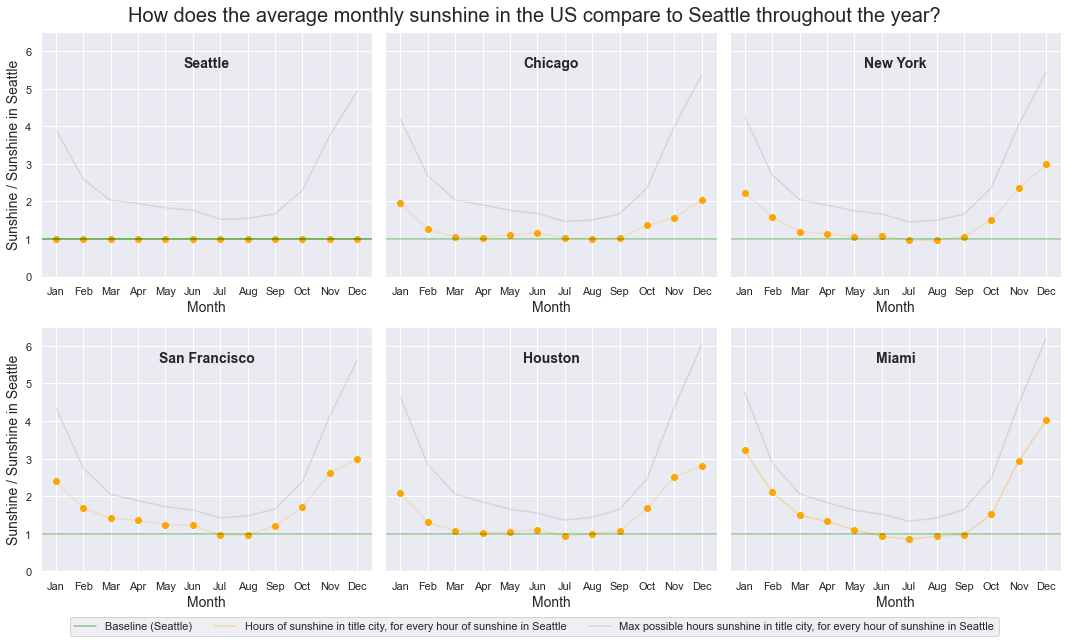

In [147]:
sns.set_theme()
fig, axs = plt.subplots(2, 3,figsize=(15,9),  sharey='all')
# Share both X and Y axes with all subplots
axs[0, 0].axhline(1, color='green', alpha=.4, label='Baseline (Seattle)')

for ii, city in enumerate(['Seattle', 'Houston', 'New York', 'San Francisco', 'Chicago', 'Miami']):
    i = int(ii%2)
    j = int(ii%3)
    if (i==1) & (j==2):
        axs[i, j].plot(data.loc[data['city'] == city, 'month'], 
         (data.loc[data['city'] == city, 'sunshine']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values, 
         label='Hours of sunshine in title city, for every hour of sunshine in Seattle', alpha=.3, color='orange')
        
        axs[i, j].scatter(data.loc[data['city'] == city, 'month'], 
         (data.loc[data['city'] == city, 'sunshine']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values, 
         color='orange')

        axs[i, j].plot(data.loc[data['city'] == city, 'month'], 
                 (data.loc[data['city'] == city, 'daylight']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values, 
                 label='Max possible hours sunshine in title city, for every hour of sunshine in Seattle', alpha=.1, color='k')
    else:
        axs[i, j].plot(data.loc[data['city'] == city, 'month'], 
                 (data.loc[data['city'] == city, 'sunshine']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values, 
                 alpha=.2, color='orange')
        axs[i, j].scatter(data.loc[data['city'] == city, 'month'], 
                 (data.loc[data['city'] == city, 'sunshine']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values, color='orange')

        axs[i, j].plot(data.loc[data['city'] == city, 'month'], 
                 (data.loc[data['city'] == city, 'daylight']).values / (data.loc[data['city'] == 'Seattle', 'sunshine']).values, 
                       alpha=.1, color='k')

    axs[i, j].axhline(1, color='green', alpha=.4)
    axs[i, j].set_title(city, y = .8333, weight='bold', fontsize=14)
    axs[i, j].set_xlabel('Month', fontsize=14)
    axs[i, j].set_ylim([0,6.5])
    if j == 0:
        axs[i, j].set_ylabel('Sunshine / Sunshine in Seattle', fontsize=14)
    

fig.tight_layout(rect=[0,.03,1, .96])
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
plt.legend( lines, labels, loc = 'lower center', bbox_to_anchor = (0, -.0,1,.97),
            bbox_transform = plt.gcf().transFigure, ncol=3)
plt.suptitle('How does the average monthly sunshine in the US compare to Seattle throughout the year?', fontsize=20)
plt.savefig('ykwang_a1_visualization.png')

In [96]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [95]:
pip install mpl_toolkits

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [106]:
capitals

'https://vega.github.io/vega-datasets/data/us-state-capitals.json'

In [111]:
data.columns

Index(['city', 'lon', 'lat', 'month', 'monthnum', 'sunshine'], dtype='object')

In [114]:
import json

In [115]:
json.loads(data[['city', 'lon', 'lat']].drop_duplicates())

TypeError: the JSON object must be str, bytes or bytearray, not DataFrame

In [113]:
for city in 

,city,lon,lat
0,Chicago,-87.623177,41.881832
12,Houston,-95.358421,29.749907
24,Miami,-80.191788,25.761681
36,New York,-73.935242,40.730610
48,San Francisco,-122.446747,37.733795
60,Seattle,-122.335167,47.608013


In [118]:
json.(data.us_state_capitals.url)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [116]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
capitals = data.us_state_capitals.url

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='lightgray'
).properties(
    title='US State Capitols',
    width=650,
    height=400
).project('albersUsa')

# Points and text

text = base.mark_text(dy=-5, align='right').encode(
    alt.Text('city', type='nominal'),
    opacity=alt.condition(~hover, alt.value(0), alt.value(1))
)


background + points + text

alt.LayerChart(...)

In [98]:
conda install altair

Solving environment: ...working... done

## Package Plan ##
Note: you may need to restart the kernel to use updated packages.


  environment location: C:\Users\ykwan\anaconda3

  added / updated specs:
    - altair


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         484 KB
    conda-4.10.0               |   py38haa95532_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  altair             pkgs/main/noarch::altair-4.1.0-py_1

The following packages will be UPDATED:

  conda                                4.9.2-py38haa95532_0 --> 4.10.0-py38haa95532_0




conda-4.10.0         | 2.9 MB    |            |   0% 
conda-4.10.0         | 2.9 MB    |            |   1% 
conda-4.10.0         | 2.9 MB    

In [100]:
conda install vega_datasets

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ykwan\anaconda3

  added / updated specs:
    - vega_datasets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vega_datasets-0.7.0        |             py_0         325 KB
    ------------------------------------------------------------
                                           Total:         325 KB

The following NEW packages will be INSTALLED:

  vega_datasets      pkgs/main/noarch::vega_datasets-0.7.0-py_0




vega_datasets-0.7.0  | 325 KB    |            |   0% 
vega_datasets-0.7.0  | 325 KB    | #4         |  15% 
vega_datasets-0.7.0  | 325 KB    | ########## | 100% 
vega_datasets-0.7.0  | 325 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to 